In [8]:
import json
from pathlib import Path
import re, pickle
import math
import numpy as np

from sentence_transformers import SentenceTransformer

model_sentence = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
# filename = 'PSA_OpenBench_Alpha.json'
# filename = 'PSA_OpenBench_Beta.json'
# filename = 'PSA_OpenBench_Gamma.json'
# filename = 'PSA_PrivateBench_4.json'
# filename = 'PSA_PrivateBench_2.json'
# filename = 'PSA_PrivateBench_3.json'
# filename = 'PSA_PrivateBench_1.json'
# data = json.loads(Path(filename).read_text())

In [9]:
def get_embedding(text):
    return model_sentence.encode(text)

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [13]:
# load the results_summary from a pickle file
with open('results_summary_Claude3.7.pkl', 'rb') as f:
    results_summary = pickle.load(f)
results_summary

[{'idx': 6,
  'q_idx': 2,
  'FLI': [-0.24123134136137925,
   -0.21498122572425615,
   -0.26714772412802107,
   -0.22569399038903387,
   -0.24351515340390842,
   -0.1963856725450309,
   -0.17540982979373682,
   -0.18742038338712144,
   -0.15174633953430078],
  'slope': np.float64(0.10890110680538154),
  'mean_result': np.float64(0.0)},
 {'idx': 14,
  'q_idx': 0,
  'FLI': [-0.5768564864531334,
   -0.45991276861857244,
   -0.36795982209268313,
   -0.2656843721755226,
   -0.010230721696800865,
   1.1930928244170255e-07,
   1.1930928244170255e-07,
   1.1930928244170255e-07,
   1.1930928244170255e-07],
  'slope': np.float64(0.7814615768536608),
  'mean_result': np.float64(0.7777777777777778)},
 {'idx': 19,
  'q_idx': 6,
  'FLI': [-0.8588031862767503,
   -0.7015510051177829,
   -0.7010277846047462,
   -0.624986036155322,
   -0.703221950801899,
   -0.5598769647140306,
   -0.526242742092204,
   -0.5072218319940461,
   -0.5636215731477636],
  'slope': np.float64(0.36306552139225556),
  'mean_res

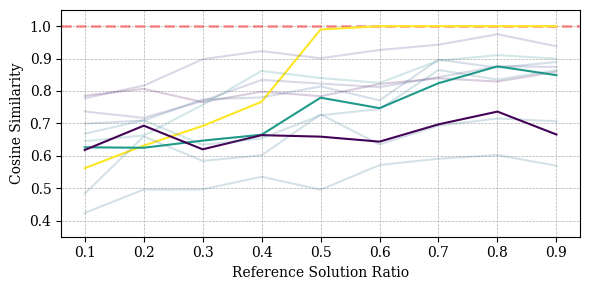

In [129]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'

# Define x-axis values
x_values = np.arange(0.1, 1.0, 0.1)
# results_summary_plot = [results_summary[i] for i in [1, 7, 9]]
results_summary_plot = results_summary
# Plot FLI for each entry in results_summary
plt.figure(figsize=(6, 3))
# Add a reference line at y=1
plt.axhline(y=1, color='red', linestyle='--', label='Solution', alpha=0.4, linewidth=2)

for i,entry in enumerate(results_summary_plot):
    idx, q_idx = entry['idx'], entry['q_idx']
    alpha_value = 1 if i in [1, 7, 9] else 0.2
    plt.plot(x_values, np.exp(entry['FLI']),label=f'(idx={idx}, q={q_idx})', linewidth=1.5,
             color=colors[i], alpha=alpha_value)


# Add labels, title, and legend
plt.xlabel('Reference Solution Ratio')
plt.ylabel('Cosine Similarity')
plt.ylim(0.35,1.05)
plt.grid(True,'major', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Claude_lines.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [101]:
# Draw the FLI in results_summary with x axis as 0.1:0.1:0.9
# [d['mean_result'] for d in results_summary]

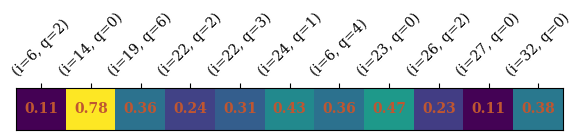

In [183]:
# single heatmap
import matplotlib.pyplot as plt

# Extract slopes and labels
slopes = [float(entry['slope']) for entry in results_summary]
labels = [f"(i={entry['idx']}, q={entry['q_idx']})" for entry in results_summary]

# Reshape into 1-row heatmap
slope_array = np.array(slopes).reshape(1, -1)

# Plot
plt.figure(figsize=(6, 1.5))
plt.imshow(slope_array, cmap="viridis", aspect="auto")

# Annotate values on heatmap
for i, val in enumerate(slopes):
    # plt.text(i, 0, f"{val:.2f}", ha='center', va='center', color='pink', fontsize=10)
    plt.text(i, 0, f"{val:.2f}", ha='center', va='center', color='#bf5631', fontsize=10, fontweight='heavy')

# Axis setup
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='center',fontsize=10)
plt.yticks([])

# Move x-axis labels to the top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

# Add colorbar
# plt.colorbar(label="Slope Value")

# Adjust layout and show
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Claude_heat.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Get the colormap to match with the lineplot
cmap = plt.get_cmap("viridis")

# Normalize the slope values to the range [0, 1] for the colormap
norm = plt.Normalize(vmin=min(slopes), vmax=max(slopes))

# Extract colors for indices 1, 7, and 9
colors = [cmap(norm(slopes[i])) for i in range(len(slopes))]

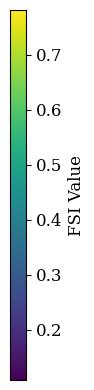

In [192]:
# Get the colorbar
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# Define the range of values for the colorbar
vmin = min(slopes)  # Minimum slope value
vmax = max(slopes)  # Maximum slope value

# Create a figure for the colorbar
plt.figure(figsize=(1., 4))  # Adjust the size for the vertical colorbar

# Create a vertical colorbar
norm = Normalize(vmin=vmin, vmax=vmax)
cbar = ColorbarBase(plt.gca(), cmap="viridis", norm=norm, orientation="vertical")

# Add a label to the colorbar
cbar.set_label("FSI Value", fontsize=12)

# Show the colorbar
plt.tight_layout()
plt.yticks(fontsize=12)

# Save the plot as a PDF
plt.savefig('Claude_Colorbar.pdf', format='pdf', bbox_inches='tight')
plt.show()

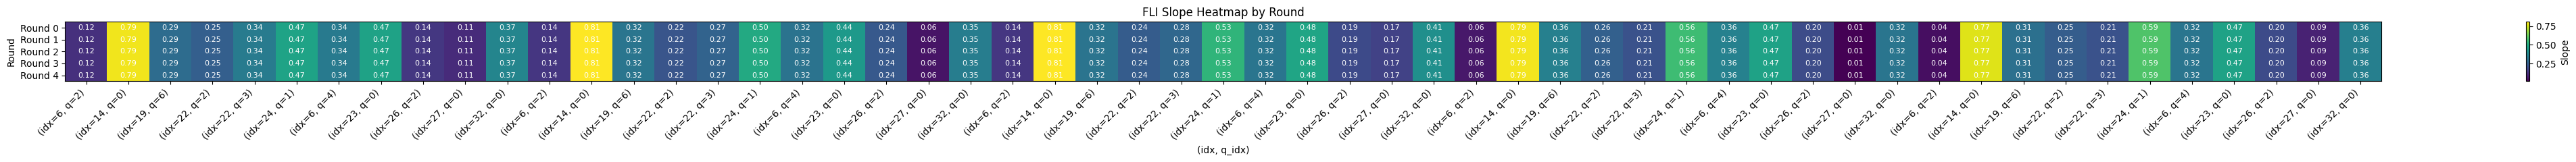

In [23]:
import matplotlib.pyplot as plt

# 1. Get list of (idx, q_idx) keys from first round (assumes same order across rounds)
column_labels = [f"(idx={r['idx']}, q={r['q_idx']})" for r in results_summary_multi[0]['results_summary']]

# 2. Extract matrix: rows = rounds, columns = (idx, q_idx)
slope_matrix = []
row_labels = []

for round_entry in results_summary_multi:
    round_num = round_entry['round']
    slopes = [float(item['slope']) for item in round_entry['results_summary']]
    slope_matrix.append(slopes)
    row_labels.append(f"Round {round_num}")

slope_matrix = np.array(slope_matrix)

# 3. Plot the heatmap
plt.figure(figsize=(len(column_labels) * 0.8, 2.5))
plt.imshow(slope_matrix, cmap="viridis", aspect="auto")

# Annotate values
for i in range(slope_matrix.shape[0]):
    for j in range(slope_matrix.shape[1]):
        val = slope_matrix[i, j]
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='white', fontsize=8)

# Axes
plt.xticks(ticks=np.arange(len(column_labels)), labels=column_labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(row_labels)), labels=row_labels)
plt.xlabel("(idx, q_idx)")
plt.ylabel("Round")
plt.title("FLI Slope Heatmap by Round")
plt.colorbar(label="Slope")
plt.tight_layout()
plt.show()
